# Playground

In [1]:
import numpy as np
import networkx as nx
import csv
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=3)
n=10
p=0.1

A_prob = np.random.rand(n,n)
print(A_prob)

A = (A_prob < p).astype('int')
print(A)

[[0.691 0.591 0.547 0.354 0.144 0.515 0.812 0.221 0.448 0.488]
 [0.307 0.898 0.793 0.065 0.068 0.248 0.627 0.827 0.987 0.293]
 [0.369 0.257 0.762 0.905 0.46  0.298 0.836 0.603 0.086 0.668]
 [0.59  0.015 0.439 0.137 0.227 0.317 0.359 0.713 0.534 0.579]
 [0.831 0.227 0.302 0.606 0.375 0.669 0.867 0.303 0.311 0.372]
 [0.616 0.125 0.605 0.826 0.175 0.729 0.444 0.061 0.346 0.095]
 [0.151 0.187 0.572 0.264 0.978 0.598 0.654 0.894 0.786 0.225]
 [0.959 0.923 0.488 0.133 0.774 0.201 0.902 0.318 0.713 0.284]
 [0.802 0.951 0.486 0.62  0.807 0.947 0.46  0.633 0.632 0.16 ]
 [0.693 0.71  0.066 0.583 0.84  0.404 0.632 0.804 0.112 0.923]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]


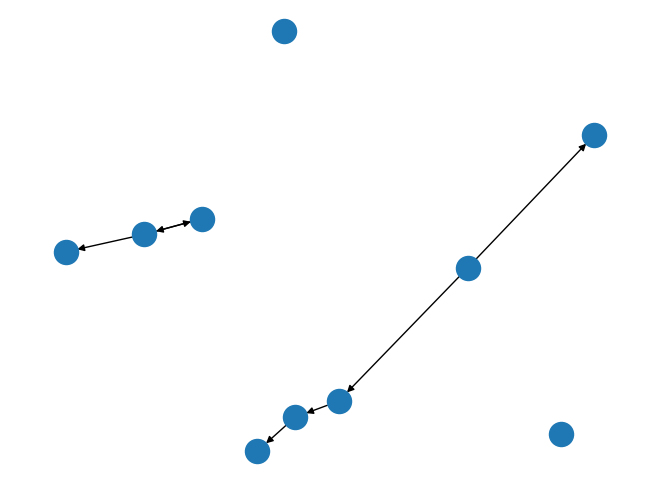

In [3]:
G = nx.DiGraph(np.array(A))
# G = nx.from_numpy_array(A)
nx.draw(G)

# File Generation

In [10]:
# Function for generating a CSV file containing an Erdos-Renyi network
def erdos_reyni_csv_generator(num_nodes, probability, ERY_filename):
    G = nx.erdos_renyi_graph(num_nodes, probability)
    with open(ERY_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            # file.write(f"{edge[0]},{edge[1]}\n")
            writer.writerow(edge)

# Example usage: Generate an Erdos-Renyi graph with 10,000 nodes and edge probability 0.1 and save it to erdos_reyni_network.csv
num_nodes = 100
probability = 0.1
ERY_filename = 'erdos_reyni_network.csv'

erdos_reyni_csv_generator(num_nodes, probability, ERY_filename)
print(f"Erdos-Renyi graph generated successfully with {num_nodes} nodes and edge probability {probability} saved to {ERY_filename}!")

Erdos-Renyi graph generated successfully with 100 nodes and edge probability 0.1 saved to erdos_reyni_network.csv!


In [5]:
# Function for generating a Barabasi-Albert network in CSV format
def barabasi_albert_csv_generator(num_nodes, num_edges_to_attach, BA_filename):
    G = nx.barabasi_albert_graph(num_nodes, num_edges_to_attach)
    with open(BA_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

# Example usage:
num_nodes = 100  # Number of nodes in the network
num_edges_to_attach = 3  # Number of edges to attach from a new node to existing nodes
BA_filename = "barabasi_albert_network.csv"  # Output filename

barabasi_albert_csv_generator(num_nodes, num_edges_to_attach, BA_filename)
print(f"Barabási-Albert network with {num_nodes} nodes and {num_edges_to_attach} edges to attach saved to {BA_filename}.")

Barabási-Albert network with 100 nodes and 3 edges to attach saved to barabasi_albert_network.csv.


In [8]:
# Generate a Watts-Strogatz network in CSV format
def watts_strogatz_csv_generator(num_nodes, k, p, WS_filename):
    G = nx.watts_strogatz_graph(num_nodes, k, p)
    with open(WS_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

# Example usage:
num_nodes = 100  # Number of nodes in the network
k = 4  # Each node is connected to k nearest neighbors in a ring topology
p = 0.1  # Probability of rewiring each edge
WS_filename = "watts_strogatz_network.csv"  # Output filename

watts_strogatz_csv_generator(num_nodes, k, p, WS_filename)
print(f"Watts-Strogatz network with {num_nodes} nodes, k={k}, and p={p} saved to {WS_filename}.")

Watts-Strogatz network with 100 nodes, k=4, and p=0.1 saved to watts_strogatz_network.csv.


# Simulation 

In [5]:
import random

# Reading the above network generated file 
def load_graph_from_csv(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            node1, node2 = row
            G.add_edge(node1, node2)
    return G

# A function to simulate the infection process
def simulate_infection(graph, p, inital_infected):
    infected = set(inital_infected) # set to allow no duplicates 
    rounds = 0
    while len(infected) < len(graph.nodes):
        new_infected = set()
        for node in infected:
            neighbors = list(graph.neighbors(node))
            random.shuffle(neighbors)
            for neighbor in neighbors:
                if random.random() < p:
                    new_infected.add(neighbor)
        
        infected.update(new_infected)
        rounds += 1
    return rounds

Average time taken to infect all nodes: 11.4


ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

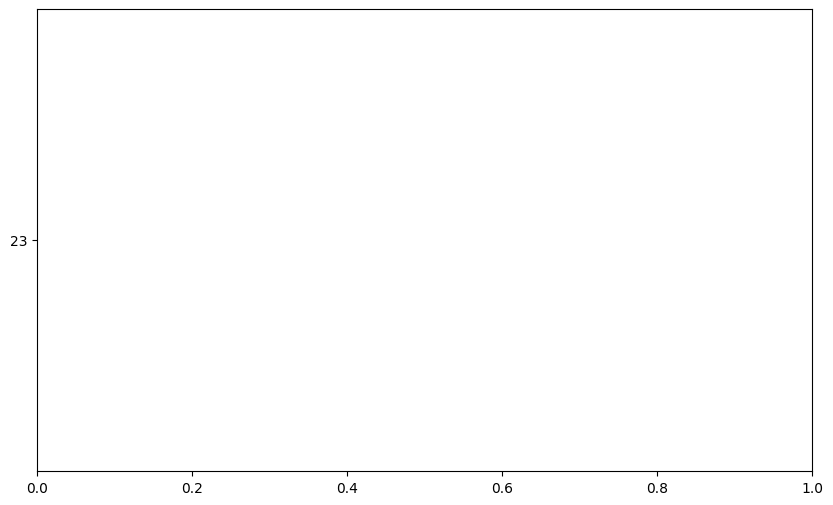

In [15]:
# Main function to run the simulation
def main():
    filename = input("Enter the filename of the CSV file for the graph: ") # first input
    p = float(input("Enter the probability value (p): "))  # second input
    initial_infected = input("Enter the initial infected node(s) separated by commas: ").split(',') # third input

    graph = load_graph_from_csv(filename)

    num_simulations = 10
    total_time = 0
    for _ in range(num_simulations):
        time_taken = simulate_infection(graph, p, initial_infected)
        total_time += time_taken

    average_time = total_time / num_simulations
    print("Average time taken to infect all nodes:", average_time)

    # # Plotting
    # plt.figure(figsize=(10, 6))
    # plt.plot(total_time, initial_infected, label='Erdos-Renyi', color='blue')
    # # Repeat for other network types

    # plt.xlabel('Time')
    # plt.ylabel('Number of Infected Nodes')
    # plt.title('Spread of Worm: Number of Infected Nodes Over Time')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

if __name__ == "__main__":
    main()

TODO - 
1. Different test cases
2. graph visualizations
3. Analysis Report

# RECTIFY THE ISSUE - No. of infected nodes in the y-axis is not same dimension as time in the x-axis when plotting...